In [17]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf


# Define the Folder Path

In [18]:
folder_path = "images"  # Ensure this folder contains only digit images


# Load and Process All Images

In [19]:
images = []
labels = []

# Loop through all image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith((".png", ".jpg", ".jpeg")):  # Process image files only
        image_path = os.path.join(folder_path, filename)

        # Load image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Resize to 28×28
        image_resized = cv2.resize(image, (28, 28))

        # Normalize pixel values (0 to 1)
        image_normalized = image_resized.astype("float32") / 255.0

        # Reshape to match model input (28, 28, 1)
        image_final = image_normalized.reshape(28, 28, 1)  # Remove batch dimension at this step


        # Extract label from filename (assuming file name starts with the digit, e.g., "3_digit.jpg")
        label = int(filename[0])  # Ensure filenames start with the correct digit (e.g., "3.jpg")

        images.append(image_final)
        labels.append(label)

# Convert lists to NumPy arrays for model predictions
images = np.array(images).reshape(-1, 28, 28, 1)  # Ensure correct batch shape
labels = np.array(labels)

print(f"✅ Loaded {len(images)} images successfully!")


✅ Loaded 10 images successfully!


# Verify Loaded Images

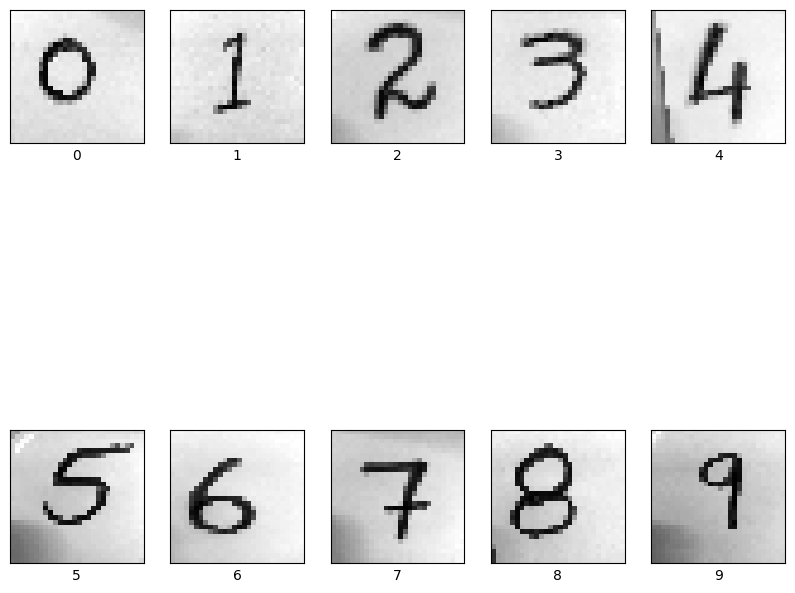

In [20]:
plt.figure(figsize=(10,10))
for i in range(min(10, len(images))):  # Show first 10 images
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(28, 28), cmap="gray")
    plt.xlabel(labels[i])

plt.show()


# Load Your Trained Model

In [21]:
# Load the trained model:
model = tf.keras.models.load_model("digit_recognizer_model.h5") 


# Predict Digits from Your Images

In [22]:
# Make predictions
predictions = model.predict(images)

# Get predicted digits
predicted_digits = np.argmax(predictions, axis=1)

print("✅ Predicted Digits:", predicted_digits)


1/1 [==============================] - 0s 227ms/step
✅ Predicted Digits: [8 8 8 8 8 8 8 8 4 8]


In [23]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, image_thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
image_resized = cv2.resize(image_thresh, (28, 28))


In [24]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])


In [25]:
tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')


In [27]:
print("Prediction Probabilities:", predictions)


Prediction Probabilities: [[6.30042925e-02 4.47806669e-04 6.24052063e-02 2.28697598e-01
  1.44488961e-01 1.88634614e-03 8.40376451e-05 1.51635217e-03
  4.02710587e-01 9.47588682e-02]
 [1.17042335e-02 1.11256819e-03 7.10575981e-03 9.32820328e-03
  4.34846610e-01 1.54779921e-03 9.49895417e-04 5.35055064e-04
  5.30281305e-01 2.58873822e-03]
 [7.00054178e-03 2.84426729e-04 1.29036792e-03 9.48871076e-02
  4.05165851e-02 2.25953729e-04 6.42372412e-04 5.04301977e-04
  8.54416192e-01 2.32116858e-04]
 [1.46180056e-02 1.46304155e-05 4.03312501e-03 1.02034891e-02
  2.40829354e-03 4.22871846e-04 9.57860630e-06 5.41327317e-05
  9.63727236e-01 4.50859684e-03]
 [2.55919427e-01 9.32704378e-03 2.76967906e-03 7.91186094e-02
  2.60239154e-01 4.74797972e-02 5.94722182e-02 2.40015402e-03
  2.77634352e-01 5.63955028e-03]
 [5.72995022e-02 5.79742755e-06 8.08652490e-03 2.26697158e-02
  5.84526046e-04 6.36476427e-02 1.92021049e-04 4.36610688e-04
  6.68558002e-01 1.78519621e-01]
 [2.04222053e-02 2.16286462e-05 

In [28]:
# Make predictions
predictions = model.predict(images)

# Get predicted digits
predicted_digits = np.argmax(predictions, axis=1)

print("✅ Predicted Digits:", predicted_digits)


1/1 [==============================] - 0s 54ms/step
✅ Predicted Digits: [8 8 8 8 8 8 8 8 4 8]


# Function to Assign Names to Predicted Digits

In [29]:
def name_predicted_digits(predictions):
    """
    This function takes an array of predicted digits and assigns them corresponding labels.
    """
    # Convert predictions to actual digit labels
    predicted_digits = np.argmax(predictions, axis=1)

    # Dictionary to name digits (optional)
    digit_names = {0: "Zero", 1: "One", 2: "Two", 3: "Three", 4: "Four", 
                   5: "Five", 6: "Six", 7: "Seven", 8: "Eight", 9: "Nine"}

    # Assign names based on predictions
    named_predictions = [digit_names[digit] for digit in predicted_digits]

    return named_predictions

# Example usage:
predictions = model.predict(images)
named_labels = name_predicted_digits(predictions)

print("Named Labels:", named_labels)


1/1 [==============================] - 0s 68ms/step
Named Labels: ['Eight', 'Eight', 'Eight', 'Eight', 'Eight', 'Eight', 'Eight', 'Eight', 'Four', 'Eight']
